In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

(-0.5, 1199.5, 726.5, -0.5)

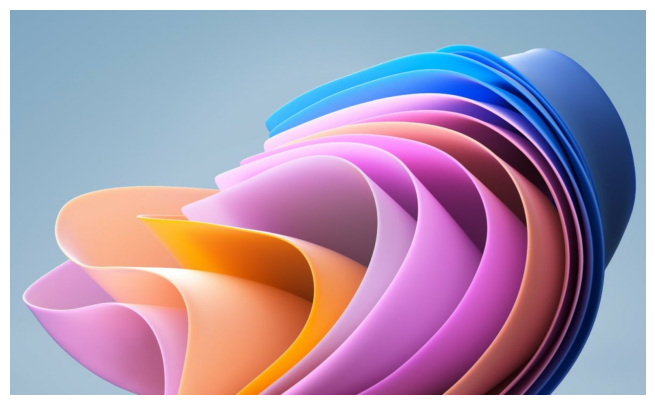

In [2]:
img = cv2.imread('img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x1e6a7088ac0>)

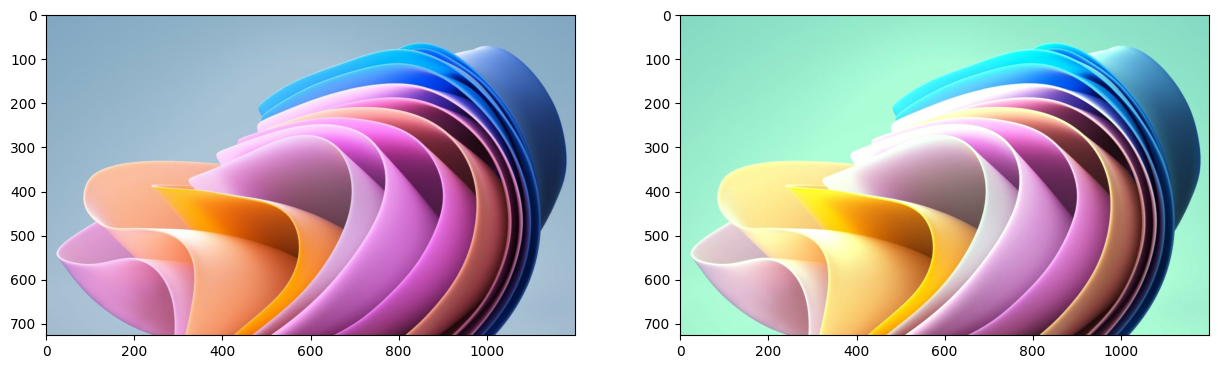

In [3]:
# Define white patch and the coefficients
row, col = 220, 600 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

(-0.5, 1199.5, 726.5, -0.5)

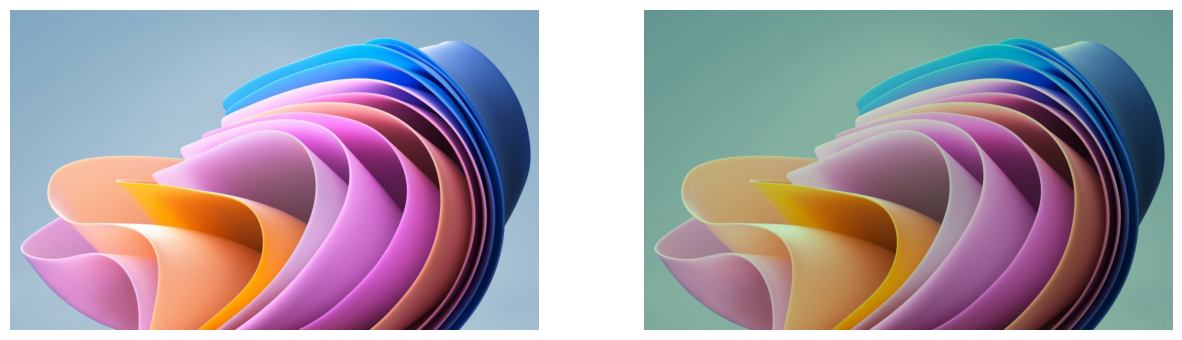

In [41]:
# Load your image
img = cv2.imread('img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)

mean_r = np.mean(img[:,:,0])
mean_g = np.mean(img[:,:,1])
mean_b = np.mean(img[:,:,2])
mean = 0.299 * mean_r + 0.587 * mean_g + 0.114 * mean_b

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

kr = 128/mean_r
kg = 128/mean_g
kb = 128/mean_b

# kr = mean/mean_r
# kg = mean/mean_g
# kb = mean/mean_b


# Apply color balancing and generate the balanced image

balanced = np.zeros_like(img)
balanced[:,:,0] = kr*img[:,:,0]
balanced[:,:,1] = kg*img[:,:,1]
balanced[:,:,2] = kb*img[:,:,2]


# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.axis("off")
plt.subplot(122), plt.imshow(balanced)
plt.axis("off")


### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

196 196 196


(-0.5, 767.5, 511.5, -0.5)

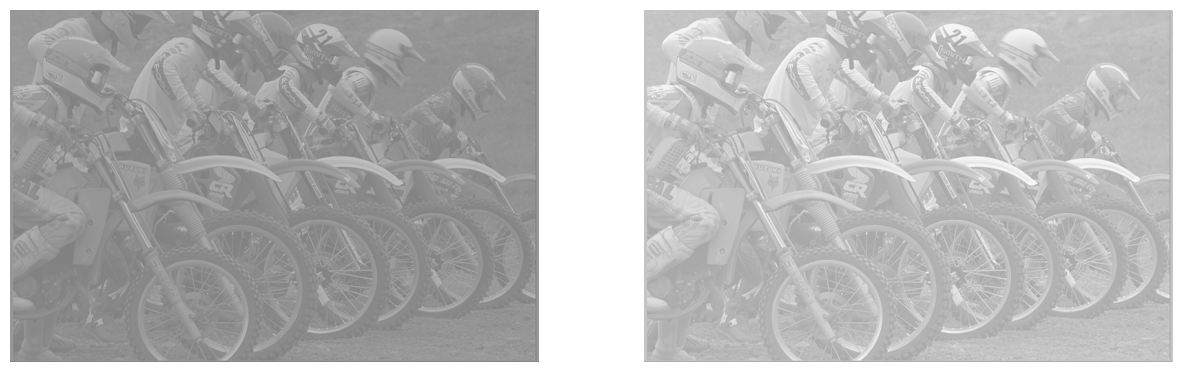

In [37]:
# Load your image
img = cv2.imread('kodim05.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:,:,0])
max_g = np.max(img[:,:,1])
max_b = np.max(img[:,:,2])
print(max_r,max_g,max_b)

# Apply scale-by-max balancing and generate the balanced image
# balanced[:, :, i] = 255 * (image[:, :, i] - min_i) / (max_i - min_i)
balanced = np.zeros_like(img)
balanced[:,:,0] = 255 / max_r * img[:,:,0]
balanced[:,:,1] = 255 / max_g * img[:,:,1]
balanced[:,:,2] = 255 / max_b * img[:,:,2]

plt.subplot(121), plt.imshow(img)
plt.axis("off")
plt.subplot(122), plt.imshow(balanced)
plt.axis("off")